Otsu's threshold value: 137
Riddle-Calvard threshold value: 137.80118246864677


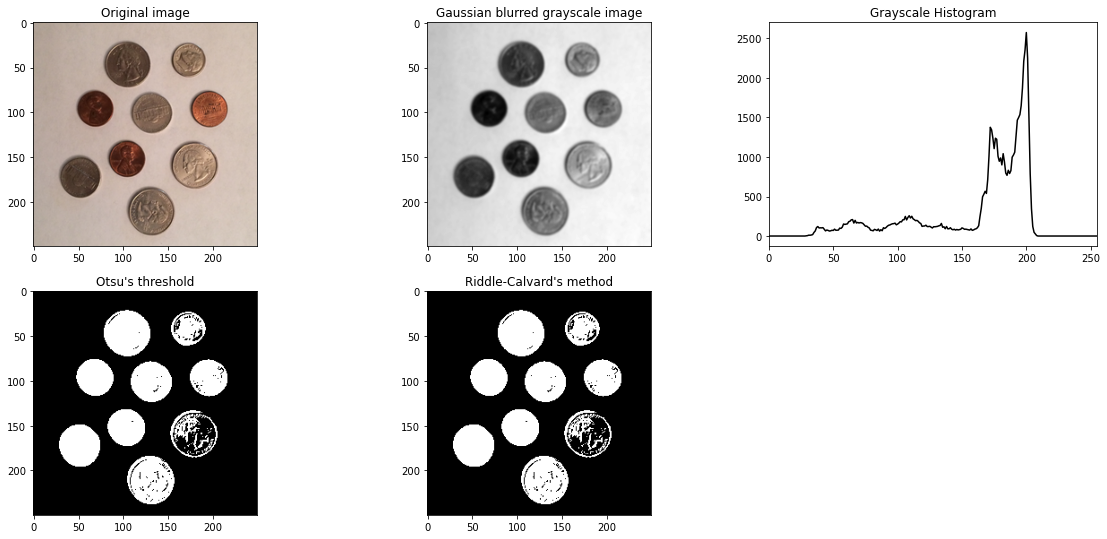

In [9]:
from matplotlib import pyplot as plt
import mahotas
import cv2

#Create path and read image
path = r'../images/coins.png'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Convert to grayscale map
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#Blurred image with Gaussian blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

#Calculate histogram of grayscale image
hist = cv2.calcHist([blurred], [0], None, [256], [0, 256])

#Calculate threshold using Otsu's method
T1 = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold value: {}".format(T1))
otsu = gray.copy()
otsu[otsu > T1] = 255
otsu[otsu < 255] = 0
otsu = cv2.bitwise_not(otsu)

#Calculate threshold using Riddle-Calvard method
T2 = mahotas.thresholding.rc(blurred)
print("Riddle-Calvard threshold value: {}".format(T2))
RC = gray.copy()
RC[RC > T2] = 255
RC[RC < 255] = 0
RC = cv2.bitwise_not(RC)

#Plot image to Matplotlib
fig = plt.figure(figsize=(20, 14)) #create figure
fig.tight_layout(pad=3)
#Ax1
ax1 = fig.add_subplot(3, 3, 1)
ax1.set_title("Original image")
ax1.imshow(image)
#Ax2
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title("Gaussian blurred grayscale image")
ax2.imshow(blurred, cmap='gray')
#Ax3
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title("Grayscale Histogram")
ax3.set_xlabel='Bins'
ax3.set_xlim([0, 255])
ax3.set_ylabel='# of pixels'
ax3.plot(hist, color='black')
#Ax4
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title("Otsu's threshold")
ax4.imshow(otsu, cmap='gray')
#Ax5
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title("Riddle-Calvard's method")
ax5.imshow(RC, cmap='gray')

# Otsu's method
In computer vision and image processing, Otsu's method, named after Nobuyuki Otsu (大津展之, Ōtsu Nobuyuki), is used to perform automatic image thresholding. In the simplest form, the algorithm returns a single intensity threshold that separate pixels into two classes, foreground and background. Otsu's method exhibits the relatively good performance if the histogram can be assumed to have bimodal distribution and assumed to possess a deep and sharp valley between two peaks. But if the object area is small compared with the background area, the histogram no longer exhibits bimodality.

# Riddle-Calvard's method
